# Your First Machine Learning Project in Python Step-By-Step #

In this post you will complete your first machine learning project using Python.

In this step-by-step tutorial you will:

1. Load a dataset and understand it’s structure using statistical summaries and data visualization.
2. Create 6 machine learning models, pick the best and build confidence that the accuracy is reliable.

If you are a machine learning beginner and looking to finally get started using Python, this tutorial was designed for you.

Let’s get started!

## How Do You Start Machine Learning in Python? ##

The best way to learn machine learning is by designing and completing small projects.

### Python Can Be Intimidating When Getting Started ###

Python is a popular and powerful interpreted language. Unlike R, Python is a complete language and platform that you can use for both research and development and developing production systems.

There are also a lot of modules and libraries to choose from, providing multiple ways to do each task. It can feel overwhelming.

The best way to get started using Python for machine learning is to complete a project.

* It will force you to install and start the Python interpreter (at the very least).
* It will given you a bird’s eye view of how to step through a small project.
* It will give you confidence, maybe to go on to your own small projects.

### Beginners Need A Small End-to-End Project ###

Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

1. Define Problem.
2. Prepare Data.
3. Evaluate Algorithms.
4. Improve Results.
5. Present Results.

The best way to really come to terms with a new platform or tool is to work through a machine learning project end-to-end and cover the key steps. Namely, from loading data, summarizing data, evaluating algorithms and making some predictions.

If you can do that, you have a template that you can use on dataset after dataset. You can fill in the gaps such as further data preparation and improving result tasks later, once you have more confidence.

### Hello World of Machine Learning ###

The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

This is a good project because it is so well understood.

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

Let’s get started with your hello world machine learning project in Python.

### Machine Learning in Python: Step-By-Step Tutorial (start here) ###

In this section we are going to work through a small machine learning project end-to-end.

Here is an overview of what we are going to cover:

1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

Take your time. Work through each step.

Try to type in the commands yourself or copy-and-paste the commands to speed things up.

### 1.1 Import libraries ###

First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [5]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Everything should load without error. If you have an error, stop. You need a working SciPy environment before continuing. See the advice above about setting up your environment.

### 1.2 Load Dataset###

We can load the data directly from the UCI Machine Learning repository.

We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.

Note that we are specifying the names of each column when loading the data. This will help later when we explore the data.

In [6]:
# Load dataset
url = "data_8_6_2023.xlsx"
dataset = pandas.read_excel(url, sheet_name="Nam4") # we need to use pandas to read dataset as a data-frame

The dataset should load without incident.

If you do have network problems, you can download the iris.data file into your working directory and load it using the same method, changing url to the local file name.

## 2. Summarize the Dataset ##

Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

### 2.1 Dimensions of Dataset ###

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [7]:
# shape: size of the structured data
print(dataset.shape)

(152, 38)


### 2.2 Peek at the Data ###

It is also always a good idea to actually eyeball your data.

In [8]:
# head
print(dataset.head(20))

    Mon1  Mon2  Mon3  Mon4  Mon5  Mon6  Mon1.1  Mon2.1  Mon3.1  Mon4.1  ...  \
0    0.0   5.6   0.0   5.2   6.5   7.4     6.7     5.6     5.3     7.0  ...   
1    0.0   8.9   0.0   6.2   9.0   5.9     8.5     6.5     8.6     6.6  ...   
2    0.0   8.3   0.0   5.8   5.9   5.6     8.4     6.3     5.2     7.0  ...   
3    0.0   8.1   0.0   5.4   6.8   6.0     8.5     6.8     5.7     7.7  ...   
4    0.0   7.2   0.0   6.0   6.7   5.5     8.2     5.8     5.1     7.3  ...   
5    0.0   7.8   0.0   6.4   7.6   6.5     8.2     6.5     8.0     6.6  ...   
6    0.0   7.6   0.0   8.1   9.0   9.0     8.8     7.0     6.9     6.3  ...   
7    0.0   8.3   0.0   6.0   6.8   6.2     7.6     6.6     5.0     5.3  ...   
8    0.0   8.5   0.0   5.2   8.6   5.5     7.8     5.3     5.8     5.6  ...   
9    0.0   8.4   0.0   7.4   8.0   6.0     7.9     5.6     5.2     5.6  ...   
10   0.0   5.8   0.0   5.6   6.1   5.5     7.0     4.4     4.7     4.6  ...   
11   0.0   7.3   0.0   6.2   6.7   7.0     7.2     5

### 2.3 Statistical Summary###

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [9]:
# Data descriptions
print(dataset.describe())

             Mon1        Mon2        Mon3        Mon4        Mon5        Mon6  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean     4.778947    6.723026    2.457895    6.140132    6.819737    6.165789   
std      2.957909    1.287611    3.339241    1.587962    1.601367    1.556873   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    5.875000    0.000000    5.275000    6.000000    5.300000   
50%      6.000000    6.800000    0.000000    6.000000    7.000000    6.000000   
75%      7.000000    7.500000    5.825000    7.025000    7.800000    7.000000   
max      8.500000    9.700000    9.700000    9.500000    9.700000    9.800000   

           Mon1.1      Mon2.1      Mon3.1      Mon4.1  ...      Mon1.5  \
count  152.000000  152.000000  152.000000  152.000000  ...  152.000000   
mean     6.635526    6.146711    5.817105    5.859276  ...    6.857895   
std      1.971331    1.661242    1.703552    1.5

We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

### 2.4 Class Distribution###

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [11]:
# class distribution
print(dataset.groupby('Mon1').size())

Mon1
0.0    39
2.0     1
3.8     1
4.3     1
5.0     8
5.3     6
5.5     5
5.7     1
5.8    10
6.0    14
6.1     2
6.3     9
6.4     2
6.5     9
6.7     1
6.8     3
7.0     4
7.2     1
7.3    11
7.4     2
7.5     7
7.6     1
7.7     3
7.8     3
7.9     2
8.0     2
8.2     1
8.3     2
8.5     1
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).


## 3. Data Visualization##

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

### 3.1 Univariate Plots###

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

This gives us a much clearer idea of the distribution of the input attributes:


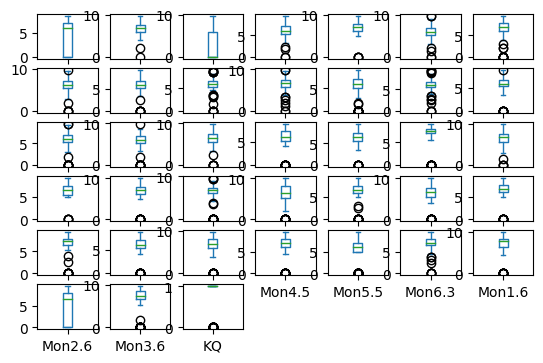

In [17]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(7, 7), sharex=False, sharey=False)
print("This gives us a much clearer idea of the distribution of the input attributes:")
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

It looks like perhaps two of the input variables have a Gaussian distribution 

This is useful to note as we can use algorithms that can exploit this assumption.


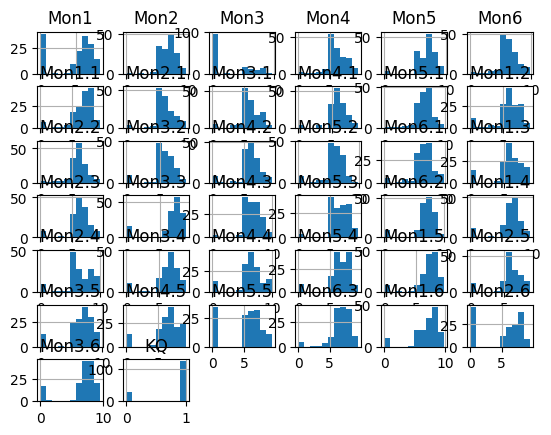

In [18]:
# histograms
dataset.hist()
print("It looks like perhaps two of the input variables have a Gaussian distribution \n")
print("This is useful to note as we can use algorithms that can exploit this assumption.")
plt.show()

### 3.2 Multivariate Plots ###

Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.


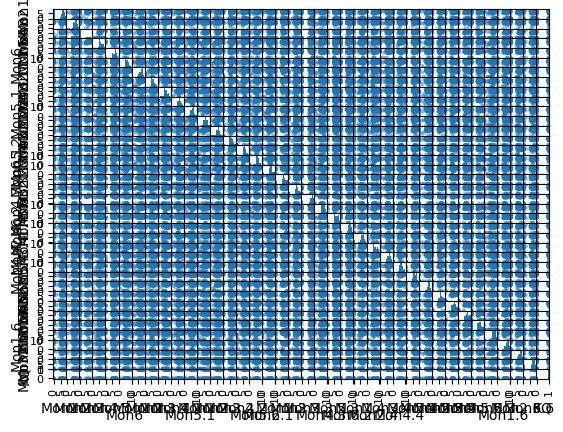

In [19]:
# scatter plot matrix
scatter_matrix(dataset)
print("Note the diagonal grouping of some pairs of attributes. \
This suggests a high correlation and a predictable relationship.") 
plt.show()

## 4. Evaluate Some Algorithms ##

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

### 4.1 Create a Validation Dataset ###

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [21]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:dataset.shape[1]-1]
Y = array[:,dataset.shape[1]-1]
Y = Y.astype('int')
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = \
        model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

### 4.2 Test Harness###

We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [22]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### 4.3 Build Models###

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our five models:

In [23]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

print(type(models)) 

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

<class 'list'>
LR: 0.925000 (0.058333)


d:\Set_Up\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Set_Up\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

LDA: 0.884615 (0.092183)
KNN: 0.867949 (0.066134)
CART: 0.860256 (0.110390)
NB: 0.933333 (0.081650)
SVM: 0.975000 (0.038188)


### 5.4 Select Best Model###

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can see that it looks like SVM has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

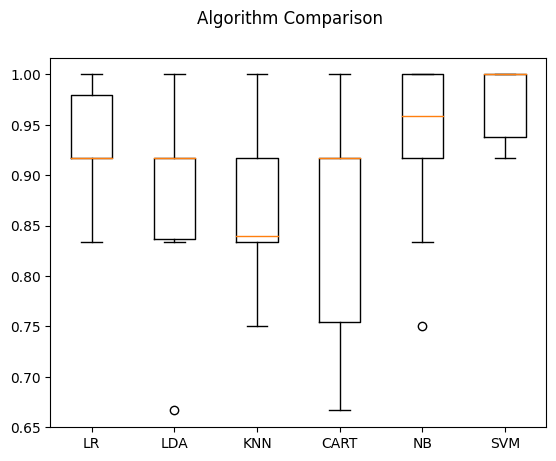

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5. Make Predictions##

If we choose kNN, we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [25]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9032258064516129
[[ 2  3]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.90      1.00      0.95        26

    accuracy                           0.90        31
   macro avg       0.95      0.70      0.76        31
weighted avg       0.91      0.90      0.89        31



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

## You Can Do Machine Learning in Python##

Work through the tutorial above. It will take you 5-to-10 minutes, max!

**You do not need to understand everything.** (at least not right now) Your goal is to run through the tutorial end-to-end and get a result. You do not need to understand everything on the first pass. List down your questions as you go. Make heavy use of the help(“FunctionName”) help syntax in Python to learn about all of the functions that you’re using.

**You do not need to know how the algorithms work.** It is important to know about the limitations and how to configure machine learning algorithms. But learning about algorithms can come later. You need to build up this algorithm knowledge slowly over a long period of time. Today, start off by getting comfortable with the platform.

**You do not need to be a Python programmer.** The syntax of the Python language can be intuitive if you are new to it. Just like other languages, focus on function calls (e.g. function()) and assignments (e.g. a = “b”). This will get you most of the way. You are a developer, you know how to pick up the basics of a language real fast. Just get started and dive into the details later.

**You do not need to be a machine learning expert.** You can learn about the benefits and limitations of various algorithms later, and there are plenty of posts that you can read later to brush up on the steps of a machine learning project and the importance of evaluating accuracy using cross validation.

**What about other steps in a machine learning project.** We did not cover all of the steps in a machine learning project because this is your first project and we need to focus on the key steps. Namely, loading data, looking at the data, evaluating some algorithms and making some predictions. In later tutorials we can look at other data preparation and result improvement tasks.

## Summary##

In this post you discovered step-by-step how to complete your first machine learning project in Python.

You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with a new platform.

## Your Next Step##

Do you work through the tutorial?

* Work through the above tutorial.
* List any questions you have.
* Search or research the answers.
* Remember, you can use the help(“FunctionName”) in Python to get help on any function.